In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
# from sklearn.compose import make_column_transformer


# MODELS

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Support Vector Machines
from sklearn.svm import SVC 

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


# MODEL EVAUATION

# Import train_test_split 
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Import precision score
from sklearn.metrics import precision_score

# Import recall_score
from sklearn.metrics import recall_score

# Import roc_curve
from sklearn.metrics import roc_curve

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Import f1_score
from sklearn.metrics import f1_score

# Model Tuning
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import RandomizedSearchCV (Handy if the Hyperparameter Grid gets larger)
from sklearn.model_selection import RandomizedSearchCV

In [17]:
telco = pd.read_csv('Churn.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Churn.csv'

## Exploratory Data Analysis

In [ ]:
telco.head()

In [ ]:
telco.dtypes
#telco.info()

In [ ]:
 telco.describe() 

In [ ]:
 # How many churners does the dataset have, and how many non-churners?
telco['Churn'].value_counts()

In [ ]:
print(telco.groupby(['Churn']).mean()) 

Churners seem to make more customer service calls than non-churners. (CustServ_Calls)

In [ ]:
print(telco.groupby(['Churn']).std())

In [ ]:
# Count the number of churners and non-churners by State
churn_by_st = pd.crosstab(telco.State, telco.Churn, normalize=False)

In [ ]:
churn_by_st['percentage'] = churn_by_st['yes']*100 / (churn_by_st['yes'] + churn_by_st['no'])

In [ ]:
churn_by_st.sort_values(by = 'percentage', ascending=False)

California, New Jersey and Texas has a higher number (and percentage) of customers who churned.

In [ ]:
#Visualise the distribution of account lenghts
sns.distplot(telco['Account_Length'])

In [ ]:
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())

In [ ]:
#Visualize the differences in account length between churners and non-churners.
sns.boxplot(x ='Churn', 
            y = 'Account_Length',
            data = telco)

 There doesn't appear to be any noticeable difference in account length.

In [ ]:
#Does the International Plan feature have an impact on account length or churn ?
# Create the box plot
sns.boxplot(x = 'Churn',
            y = 'Account_Length',
            data = telco,
            #remove the outliers
            sym = "",
            hue = 'Intl_Plan') 

# Display the plot
plt.show()

There doesn't appear to be any noticeable difference in account length.

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

axes = {ax1:['Day_Mins',"Day"], ax2:['Eve_Mins',"Eve"],ax3:['Night_Mins',"Night"],ax4:['Intl_Mins',"Int"]}


for x in axes:
    k = axes[x]
    freq = k[0]
    title = k[1]
    sns.histplot(telco[freq],ax = x)

All of these features appear to be well approximated by the normal distribution. If this were not the case, we would have to consider applying a feature transformation of some kind.

There's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners.

Do customers who have international plans make more customer service calls? 
Or do they tend to churn more? How about voicemail plans? 

In [ ]:
#Does having a voice mail plan affect the number of customer service calls or churn?

# Create the box plot
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            #remove the outliers
            sym = "",
            hue = 'Vmail_Plan') 

# Display the plot
plt.show()

There isn't much difference.

In [ ]:
#Does having an international plan affect the number of customer service calls or churn?
# Create the box plot
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            #remove the outliers
            sym = "",
            hue = 'Intl_Plan') 

# Display the plot
plt.show()

Customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls.

## Data Preprocessing

In [ ]:
print(telco.dtypes)

# Print the number of unique values in each telco column
print(telco.nunique())

#### Separate numerical and categorical columns

In [ ]:
# Store Phone and Churn column names
phone = ['Phone']
target = ['Churn']
unnecessary = ['Area_Code']

# Store categorical column names
categorical = telco.nunique()[telco.nunique() < 5].keys().tolist()
categorical.append('State')
categorical.remove(unnecessary[0])

# Remove target from the list of categorical variables
categorical.remove(target[0])

# Store numerical column names
numerical = [x for x in telco.columns if x not in phone + target + categorical + unnecessary]

In [ ]:
print(categorical)
print('\n')
print(numerical)

#### One hot encoding

In [ ]:
# Perform one-hot encoding to categorical variables 
telco = pd.get_dummies(data = telco, columns = categorical, drop_first=True)

In [ ]:
telco = telco.rename(columns = {'Intl_Plan_yes' : 'Intl_Plan', 'Vmail_Plan_yes' : 'Vmail_Plan'})

In [ ]:
telco['Churn'] = telco['Churn'].replace({'yes': 1, 'no': 0})

In [ ]:
telco['Churn']

##### Scaling numerical features

In [ ]:
# Initialize StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on numerical columns
scaled_numerical = scaler.fit_transform(telco[numerical])

# Build a DataFrame from scaled_numerical
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)

In [ ]:
scaled_numerical.head()

In [ ]:
telco = telco.drop(columns=numerical, axis = 1)

In [ ]:
telco = telco.merge(right = scaled_numerical, 
            how = 'left',
            left_index = True,
            right_index = True
           )

## Feature selection & Feature Engineering

In [ ]:
telco.info()

In [ ]:
#Drop the unnecessary features
#Drop the unique identifiers
telco = telco.drop(['Area_Code', 'Phone'], axis = 1)

In [ ]:
telco.columns

## Modeling

We'll predict the customer churn.
Supervised machine learning with historical data

In [ ]:
features = telco.columns.tolist()
features.remove('Churn')

In [ ]:
# Create feature variable
X = telco[features]

# Create target variable
y = telco['Churn']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Which model to use ?

- Logistic Regression
- Decision Tree
- Support vector machines
- Random forests

In [ ]:
# Initialize the model
lr = LogisticRegression()

# Fit the model on the training data
#lr.fit(X_train, y_train)

# Predict the values on the training data
#y_train_pred = lr.predict(X_train)

# Predict the values on the testing data
#y_test_pred = lr.predict(X_test)


In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
rf = RandomForestClassifier()

In [ ]:
svc = SVC(probability=True)

In [ ]:
models = {'Logistic regression':lr, 'Decision Tree': dtc,'Random Forest' : rf, 'Support Vector Machines':svc}

In [ ]:
ac_list = []
pre_list = []
rec_list = []
name_list = []
auc_list = []
f1_list = []

for item in models.items():
        # Fit the model on the training data
        item[1].fit(X_train, y_train)

        # Predict the values on the training data
        y_train_pred = item[1].predict(X_train)

        # Predict the values on the testing data
        y_test_pred = item[1].predict(X_test)

        # Measuring model accuracy
        train_accuracy = round(accuracy_score(y_train, y_train_pred),4)
        test_accuracy = round(accuracy_score(y_test, y_test_pred),4)

        # Measuring model precision
        train_precision = round(precision_score(y_train, y_train_pred),4)
        test_precision = round(precision_score(y_test, y_test_pred),4)

        # Measuring model recall
        train_recall =  round(recall_score(y_train, y_train_pred),4)
        test_recall = round(recall_score(y_test, y_test_pred),4)
        
        # Calculating AUC
        # Generate the probabilities
        y_pred_prob = item[1].predict_proba(X_test)[:, 1]   
        auc_score = roc_auc_score(y_test, y_pred_prob)
        
        # Calculating F1 score - Check it!!!
        
        f1_sc = f1_score(y_test, y_test_pred)
    
        name_list.append(item[0])
        ac_list.append(test_accuracy)
        pre_list.append(test_precision)
        rec_list.append(test_recall)
        auc_list.append(auc_score)
        f1_list.append(f1_sc)

In [ ]:
df = pd.DataFrame({'Model': name_list,'Accuracy': ac_list, 'Precision': pre_list, 'Recall': rec_list, 'ROC_AUC': auc_list, 'F1': f1_list})
df


## Evaluating Model Performance

#### Model Metrics

- Accuracy
- Precision
- Recall
- ROC Curve
- Precision-recall curve (which shows the tradeoff between precision and recall for different thresholds.)
F1 Score

In [3]:
print(len(X_train), len(X_test))

NameError: name 'X_train' is not defined

In [133]:
telco['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [140]:
# Print the confusion matrix
#print(confusion_matrix(y_test, y_pred))

Varying training set size

The size of your training and testing sets influences model performance. Models learn better when they have more training data. However, there's a risk that they overfit to the training data and don't generalize well to new data, so in order to properly evaluate the model's ability to generalize, you need enough testing data. As a result, there is a important balance and trade-off involved between how much you use for training and how much you hold for testing.

In [142]:
# Create feature variable
X = scaled_features.drop(['Churn','State'], axis=1)
  
# Create target variable
y = scaled_features['Churn']

# Create training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [131]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

rndClf = RandomForestClassifier()   
                       
# Fit to the training data
rndClf.fit(X_train, y_train) 
      
# Print the recall      
#print(recall_score(y_test, y_pred))

RandomForestClassifier()

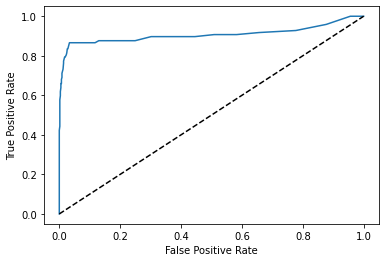

In [129]:
# ROC Curve

# Generate the probabilities
y_pred_prob = rndClf.predict_proba(X_test)[:, 1]     

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [130]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9069542412732864


Both are important metrics, and depending on how the business is trying to model churn, you may want to focus on optimizing one over the other. Often, stakeholders are interested in a single metric that can quantify model performance. The AUC is one metric you can use in these cases, and another is the F1 score, which is calculated 


0.87 => This indicates that this baseline random forest classifier is quite good!

In [201]:
# Print the F1 score
#print(f1_score(y_test, y_pred))

# Model Tuning

In [179]:
# 1. Grid Search

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(rndClf, param_grid)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

{'max_features': 'log2'}


In [169]:
# Create the hyperparameter grid
param_grid2 = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search2 = GridSearchCV(rndClf, param_grid2)

# Fit the model
grid_search2.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10]})

In [171]:
grid_search2.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 10}

In [180]:
# 2. Feature importances (Which features are important in driving churn)
importances = rndClf.feature_importances_

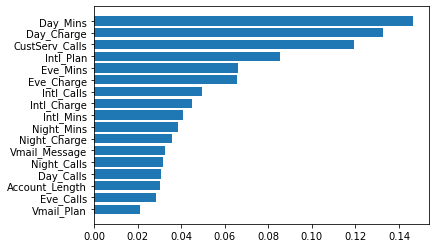

In [181]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

The plot tells us that CustServ_Calls, Day_Mins and Day_Charge are the most important drivers of churn. What if we added additional sources of data and more features?

6 new features have been added to the telco DataFrame:

Region_Code
Cost_Call
Total_Charge
Total_Minutes
Total_Calls
Min_Call